# Atualização de pacote e importação de bibliotecas


In [ ]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 26.4 MB/s eta 0:00:00


In [46]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Padronização


x = (x - média(x)) / desvio padrão(x)


# Normalização


x = (x - min(x)) / (max(x) - min(x))

# Pré-processamento dos dados

## Base de dados de crédito


In [ ]:
base_credit.head()

In [ ]:
base_credit.describe()

In [ ]:
base_credit[base_credit['income'] >= 69995.685578]

### Visualização dos dados

In [ ]:
np.unique(base_credit['default'], return_counts = True)

In [ ]:
sns.countplot(x = base_credit['default']);

In [ ]:
plt.hist(x = base_credit['age']);

In [ ]:
plt.hist(x = base_credit['income']);

In [ ]:
plt.hist(x = base_credit['loan']);

In [ ]:
grafico = px.scatter_matrix(base_credit, dimensions = ['age', 'income', 'loan'], color = 'default');
grafico.show();

### Tratamento de valores inconsistentes

In [ ]:
# apagar a coluna inteira (recomendado para quando a maioria dos dados está inconsistente)
base_credit2 = base_credit.drop('age', axis = 1); # axis = 1 para coluna e 0 para linha
base_credit2


In [ ]:
# apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

In [ ]:
# preencher os valores inconsistentes manualmente (recomendado)

In [ ]:
# preencher os valores inconsistentes com a média
base_credit[base_credit['age'] > 0].mean()

clientid     1001.956935
income      45333.864334
age            40.927689
loan         4445.487716
default         0.141713
dtype: float64

In [ ]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

In [ ]:
np.unique(base_credit['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

In [ ]:
base_credit.head(30)

### Tratamento de valores faltantes

In [ ]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [ ]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

### Divisão entre previsores e classe


In [ ]:
x_credit = base_credit.iloc[:, 1:4].values # x para previsores 

In [ ]:
y_credit = base_credit.iloc[:, 4].values # y para classe

### Escalonamento dos valores

In [ ]:
x_credit[:,0]

array([66155.92509508, 34415.15396582, 57317.17006303, ...,
       44311.44926231, 43756.05660491, 69436.57955155])

In [ ]:
x_credit[:, 0].min(), x_credit[:,1].min(), x_credit[:, 2].min() # pegando menor renda, menor idade e menor dívida 

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
x_credit[:, 0].max(), x_credit[:,1].max(), x_credit[:, 2].max() # pegando maior renda, maior idade e maior dívida

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
x_credit[:, 0].min(), x_credit[:,1].min(), x_credit[:, 2].min() # pegando menor renda, menor idade e menor dívida APÓS PADRONIZAÇÃO

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [ ]:
x_credit[:, 0].max(), x_credit[:,1].max(), x_credit[:, 2].max() # pegando maior renda, maior idade e maior dívida APÓS PADRONIZAÇÃO

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

In [ ]:
x_credit[:,0]

array([ 1.45393393, -0.76217555,  0.83682073, ..., -0.07122592,
       -0.11000289,  1.682986  ])

## Base de dados do censo


### Exploração dos dados

In [ ]:
base_census = pd.read_csv('/content/census.csv')

In [ ]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
base_census[base_census['hour-per-week'] >= 99]

age          workclass  final-weight      education  education-num  \
935     37            Private        176900        HS-grad              9   
1172    25            Private        404616        Masters             14   
1887    55   Self-emp-not-inc        184425   Some-college             10   
3578    37       Self-emp-inc        382802      Doctorate             16   
4086    50                  ?        174964           10th              6   
...    ...                ...           ...            ...            ...   
30992   40       Self-emp-inc        104235        Masters             14   
31681   43            Private        266324        HS-grad              9   
31699   43   Self-emp-not-inc        163108   Some-college             10   
32469   58       Self-emp-inc        181974      Doctorate             16   
32531   30                  ?         33811      Bachelors             13   

            marital-status        occupation    relationship  \
935     Married-civ-spouse      Craft-repair         Husband   
1172    Married-civ-spouse   Farming-fishing   Not-in-family   
1887    Married-civ-spouse   Farming-fishing         Husband   
3578    Married-civ-spouse    Prof-specialty         Husband   
4086    Married-civ-spouse                 ?         Husband   
...                    ...               ...             ...   
30992        Never-married     Other-service       Own-child   
31681   Married-civ-spouse      Craft-repair         Husband   
31699   Married-civ-spouse   Farming-fishing         Husband   
32469        Never-married    Prof-specialty   Not-in-family   
32531        Never-married                 ?   Not-in-family   

                      race      sex  capital-gain  capital-loos  \
935                  White     Male             0             0   
1172                 White     Male             0             0   
1887                 White     Male             0             0   
3578                 Black     Male             0             0   
4086                 White     Male             0             0   
...                    ...      ...           ...           ...   
30992                White     Male             0             0   
31681                White     Male             0          1902   
31699                White     Male             0             0   
32469                White   Female             0             0   
32531   Asian-Pac-Islander   Female             0             0   

       hour-per-week  native-country  income  
935               99   United-States    >50K  
1172              99   United-States    >50K  
1887              99   United-States    >50K  
3578              99   United-States    >50K  
4086              99   United-States   <=50K  
...              ...             ...     ...  
30992             99   United-States   <=50K  
31681             99   United-States    >50K  
31699             99   United-States   <=50K  
32469             99               ?   <=50K  
32531             99   United-States   <=50K  

[85 rows x 15 columns]

In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Visualização dos dados

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

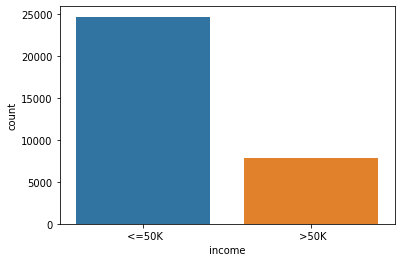

In [ ]:
sns.countplot(x = base_census['income']);

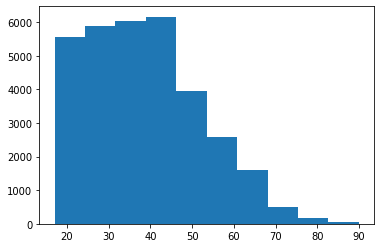

In [ ]:
plt.hist(x = base_census['age']);

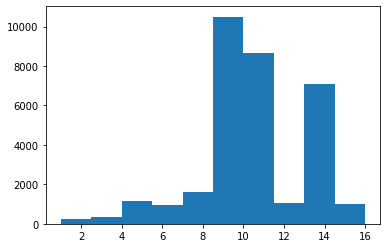

In [ ]:
plt.hist(x = base_census['education-num']);

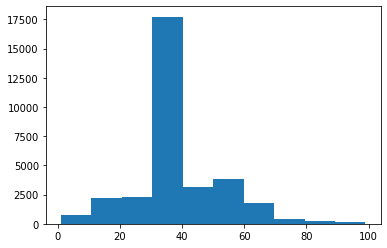

In [ ]:
plt.hist(x = base_census['hour-per-week']);

In [ ]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show();

In [ ]:
grafico2 = px.treemap(base_census, path=['occupation', 'relationship']);
grafico2.show()

In [ ]:
grafico3 = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico3.show()

In [ ]:
grafico4 = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico4.show()

In [ ]:
grafico5 = px.parallel_categories(base_census, dimensions=['education', 'income']);
grafico5.show();

### Divisão entre previsores e classe

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
x_census = base_census.iloc[:, 0:14].values # previsores
x_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
y_census = base_census.iloc[:, 14].values # classe
y_census[0]

' <=50K'

### Tratamento de atributos categóricos

#### LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder_teste = LabelEncoder()

In [ ]:
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
teste = label_enconder_teste.fit_transform(x_census[:,1]) # entendo LabelEncoder
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1]);
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3]);
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5]);
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6]);
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7]);
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8]);
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9]);
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13]);

In [ ]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
x_census

#### OneHotEncoder (maneira mais recomendada)

In [ ]:
# Carro

# Gol   Pálio   Uno
#   1     2       3

# Gol   1 0 0
#Pálio  0 1 0
# Uno   0 0 1

In [ ]:
len(np.unique(base_census['workclass']))

9

In [ ]:
len(np.unique(base_census['occupation']))

15

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
x_census[0]

In [ ]:
x_census.shape

(32561, 108)

### Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [ ]:
x_census[0]

## Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

## Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump(
    [x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f
  )

In [ ]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump(
      [x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f
  )

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

## Base de dados risco de crédito

In [ ]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
base_risco_credito

In [ ]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values # previsores
x_risco_credito

In [ ]:
y_risco_credito = base_risco_credito.iloc[:, 4].values # classe
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])
x_risco_credito

In [ ]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [ ]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [ ]:
#historia boa(0), divida alta(0), garantias nenhuma(1), renda > 35(2)
#historia ruim(2), divida alta(0), garantias adequada(0), renda < 15(0)
previsao_risco_credito = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0], [0,1,1,0]])

In [ ]:
previsao_risco_credito

array(['baixo', 'moderado', 'alto'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base de dados de crédito - 93.8%

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [ ]:
previsao_credit_data = naive_credit_data.predict(x_credit_teste)

In [ ]:
previsao_credit_data #previsao 

In [ ]:
y_credit_teste #dados reais

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsao_credit_data) #comparando previsoes com dados reais

0.938

In [ ]:
confusion_matrix(y_credit_teste, previsao_credit_data)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.938

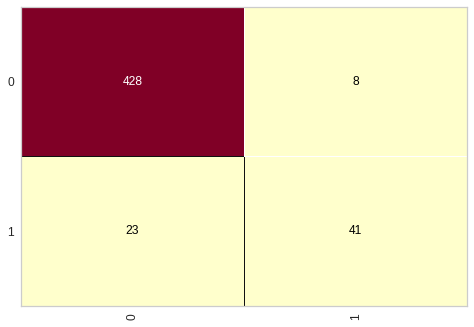

In [ ]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsao_credit_data))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base de dados do censo - 47.67%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)
naive_census

GaussianNB()

In [ ]:
previsao_census = naive_census.predict(x_census_teste)
previsao_census

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste #dados reais

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_census_teste, previsao_census)

0.4767656090071648

0.4767656090071648

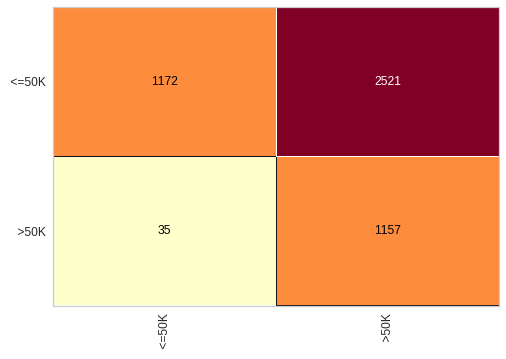

In [ ]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsao_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Árvores de Decisão Simples

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Base de dados risco de crédito

In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito, y_risco_credito

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion="entropy")

In [ ]:
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

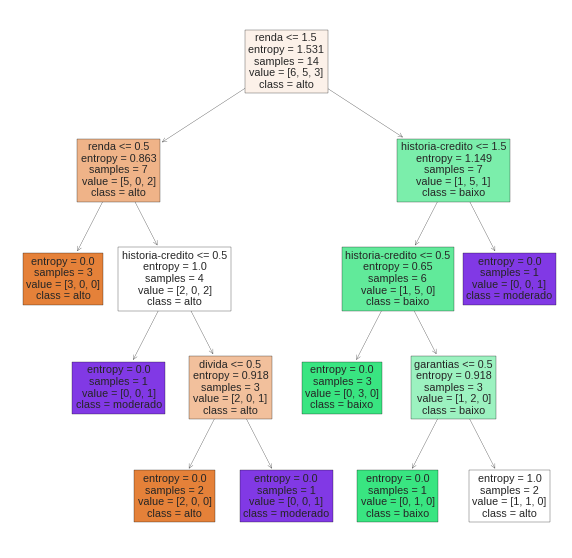

In [ ]:
from sklearn import tree
previsores = ['historia-credito', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names = previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [ ]:
#historia boa(0), divida alta(0), garantias nenhuma(1), renda > 35(2)
#historia ruim(2), divida alta(0), garantias adequada(0), renda < 15(0)
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base de dados de crédito - 98.2%

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion="entropy", random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

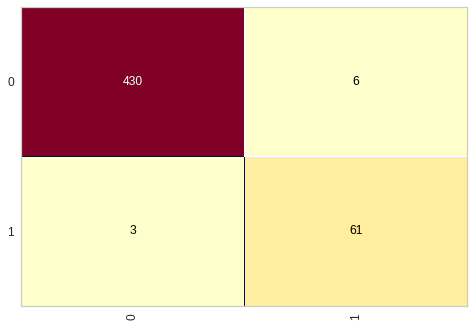

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [ ]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names = previsores, class_names=['0', '1'], filled=True);
figura.savefig('arvore_credit.png')

## Base de dados do censo - 81.04%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy')
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
previsoes = arvore_census.predict(x_census_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

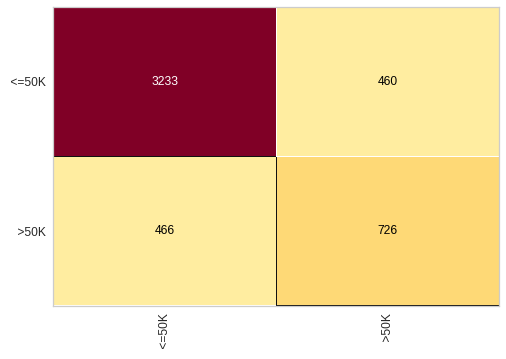

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



In [ ]:
from sklearn import tree
previsores = ['workclass', 'final-weight', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loos', 'hour-per-week', 'native-country']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(30,30))
tree.plot_tree(arvore_census, class_names=arvore_census.classes_, filled=True);
figura.savefig('arvore_census.png')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Base de dados de crédito - 98.2% (100 árvores)

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.91      0.93        64

    accuracy                           0.98       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.98      0.98      0.98       500



0.982

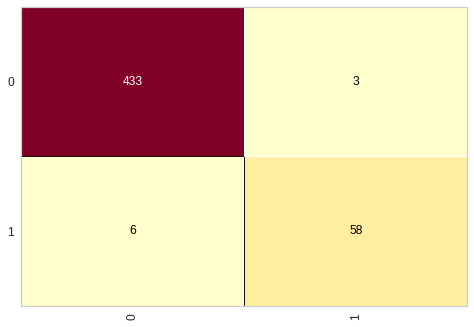

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

## Base de dados do censo - 85.07% (100 árvores)

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = random_forest_census.predict(x_census_teste)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



0.8507676560900717

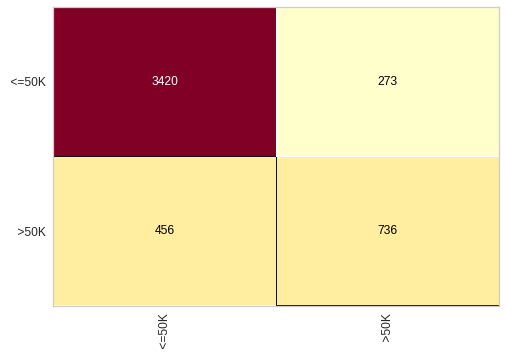

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

# Regras

In [ ]:
!pip install Orange3

In [ ]:
import Orange

## Base de dados risco de crédito


In [ ]:
base_risco_credito = Orange.data.Table('/content/risco_credito_regras.csv')

In [ ]:
base_risco_credito.domain

[historia, divida, garantias, renda | risco]

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

In [ ]:
#historia boa, divida alta, garantias nenhuma, renda > 35
#historia ruim, divida alta, garantias adequada, renda < 15
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma', 'acima_35'], ['ruim', 'alta', 'adequada', '0_15']])
previsoes

array([1, 0])

In [ ]:
base_risco_credito.domain.class_var #0=alto, 1=baixo, 2=moderado

DiscreteVariable(name='risco', values=('alto', 'baixo', 'moderado'))

In [ ]:
for i in previsoes:
  print(base_risco_credito.domain.class_var.values[i])

baixo
alto


## Base de dados de crédito - 97.2%

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')

In [ ]:
base_credit.domain

[income, age, loan | default]

In [ ]:
base_credit_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25) #25% dos dados para teste
base_credit_dividida

([[41019.5, 23.2543, 3005.83 | 0],
  [54656.5, 18.3938, 9911.13 | 1],
  [37660.8, 53.7451, 2129.6 | 0],
  [38277.9, 44.9092, 7405.8 | 0],
  [49240.8, 53.2546, 8004.36 | 0],
  ...
 ], [[34332.3, 36.5014, 1225.72 | 0],
  [20346.5, 35.7161, 656.033 | 0],
  [61799.1, 56.958, 5619.22 | 0],
  [58978, 30.331, 9442.01 | 1],
  [60218.5, 32.4719, 3157.96 | 0],
  ...
 ])

In [ ]:
base_credit_treinamento = base_credit_dividida[1]
base_credit_teste = base_credit_dividida[0]
len(base_credit_treinamento), len(base_credit_teste)

(1500, 500)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_credit_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit_treinamento, base_credit_teste, [lambda testdata: regras_credit])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes), Orange.evaluation.F1(previsoes)

(array([0.972]), array([0.90410959]))

## Base de dados do censo - 82.49%

In [ ]:
base_census = Orange.data.Table('/content/census_regras.csv')
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
base_census_dividida = Orange.evaluation.testing.sample(base_census, n = 0.25) #25% dos dados para teste
base_census

[[39, State-gov, 77516, Bachelors, 13, ... | <=50K],
 [50, Self-emp-not-inc, 83311, Bachelors, 13, ... | <=50K],
 [38, Private, 215646, HS-grad, 9, ... | <=50K],
 [53, Private, 234721, 11th, 7, ... | <=50K],
 [28, Private, 338409, Bachelors, 13, ... | <=50K],
 ...
]

In [ ]:
base_census_treinamento = base_census_dividida[1]
base_census_teste = base_census_dividida[0]
len(base_census_treinamento), len(base_census_teste)

(24421, 8140)

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_census = cn2(base_census_treinamento)

In [ ]:
for regras in regras_census.rule_list:
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census_treinamento, base_census_teste, [lambda testdata: regras_census])
previsoes

In [ ]:
Orange.evaluation.CA(previsoes), Orange.evaluation.F1(previsoes)

(array([0.82493857]), array([0.62070801]))

# Classificador base - Majority Learner

## Base de dados de crédito - 85.85% 

In [ ]:
base_credit = Orange.data.Table('/content/credit_data_regras.csv')
base_credit.domain

[income, age, loan | default]

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)
#ponto base para avaliação de algoritmos
#caso um algoritmo marque <85% podemos inferir que ele não é uma boa base

array([0.8585])

In [ ]:
from collections import Counter 
Counter(str(registro.get_class()) for registro in base_credit)

Counter({'0': 1717, '1': 283})

In [ ]:
1717 / (1717+283)

0.8585

## Base de dados do censo - 75.91%

In [ ]:
base_census = Orange.data.Table('/content/census_regras.csv')
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority])

In [ ]:
Orange.evaluation.CA(previsoes)
#ponto base para avaliação de algoritmos
#caso um algoritmo marque <75% podemos inferir que ele não é uma boa base

array([0.75919044])

In [ ]:
from collections import Counter 
Counter(str(registro.get_class()) for registro in base_census)

Counter({'<=50K': 24720, '>50K': 7841})

In [ ]:
24720 / (24720+7841)

0.7591904425539756

# K-ésimo Vizinho mais Próximo (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Base de dados de crédito - 98.6% (k = 5)

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #valores default
knn_credit.fit(x_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_credit.predict(x_credit_teste);

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização do arquivo base efetuada na aba pré processamento - base crédito - escalonamento dos valores 

0.986

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

0.986

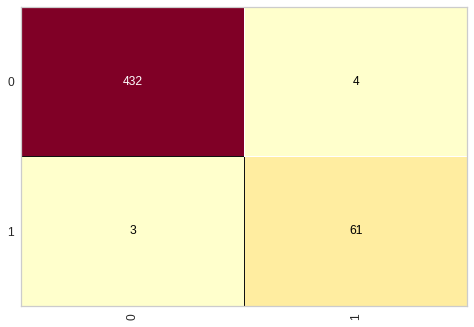

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit);
cm.fit(x_credit_treinamento, y_credit_treinamento);
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base de dados do censo - 82.23% (k = 5)

In [ ]:
import pickle
with open('census.pkl', 'rb') as f:
  x_censo_treinamento, y_censo_treinamento, x_censo_teste, y_censo_teste = pickle.load(f)

In [ ]:
x_censo_treinamento.shape, y_censo_treinamento.shape, x_censo_teste.shape, y_censo_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
knn_censo = KNeighborsClassifier(n_neighbors=5)
knn_censo.fit(x_censo_treinamento, y_censo_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_censo.predict(x_censo_teste)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
accuracy_score(y_censo_teste, previsoes) # padronização do arquivo base efetuada na aba pré processamento - base censo - escalonamento dos valores 

0.8223132036847492

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

0.8223132036847492

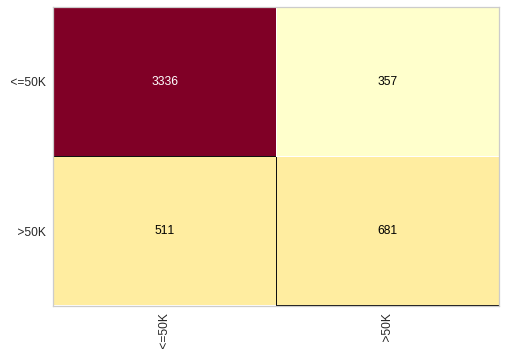

In [ ]:
cm = ConfusionMatrix(knn_censo);
cm.fit(x_censo_treinamento, y_censo_treinamento);
cm.score(x_censo_teste, y_censo_teste)

In [ ]:
print(classification_report(y_censo_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      3693
        >50K       0.66      0.57      0.61      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.74      0.75      4885
weighted avg       0.82      0.82      0.82      4885



# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

## Base de dados risco de crédito


In [ ]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [ ]:
x_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [ ]:
x_risco_credito = np.delete(x_risco_credito, [2, 7, 11], axis=0) #apagando registros 'moderado' para melhor entendimento
y_risco_credito = np.delete(y_risco_credito, [2,7,11], axis=0)

In [ ]:
x_risco_credito.shape, y_risco_credito.shape

((11, 4), (11,))

In [ ]:
logistic_risco_credito = LogisticRegression(random_state = 1)
logistic_risco_credito.fit(x_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [ ]:
logistic_risco_credito.intercept_#b0

array([-0.80828993])

In [ ]:
logistic_risco_credito.coef_ #valor dos previsores

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [ ]:
#historia boa, divida alta, garantias nenhuma, renda > 35
#historia ruim, divida alta, garantias adequada, renda < 15
previsoes1 = logistic_risco_credito.predict([[0,0,1,2], [2,0,0,0]])
previsoes1

array(['baixo', 'alto'], dtype=object)

## Base de dados de crédito - 94.6%

In [ ]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
logistic_credit = LogisticRegression(random_state = 1)
logistic_credit.fit(x_credit_treinamento, y_credit_treinamento)#criando parametro b0

LogisticRegression(random_state=1)

In [ ]:
logistic_credit.intercept_, logistic_credit.coef_

(array([-6.02976095]), array([[-2.54927091, -3.72279861,  3.93940349]]))

In [ ]:
previsoes = logistic_credit.predict(x_credit_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

0.946

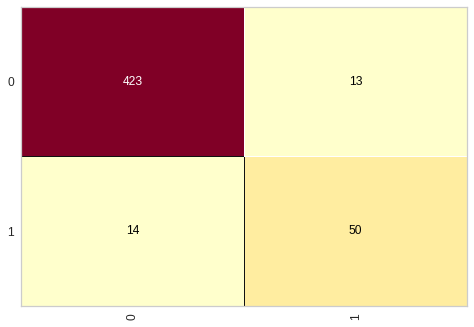

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base de dados do censo - 84.95%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
logistic_census = LogisticRegression(random_state = 1)
logistic_census.fit(x_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [ ]:
previsoes = logistic_census.predict(x_census_teste)

In [ ]:
accuracy_score(y_census_teste, previsoes)

0.849539406345957

0.849539406345957

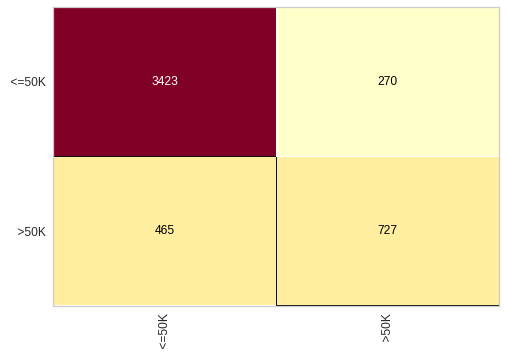

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# Máquinas de vetores de suporte (SVM)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Base de dados de crédito - 98.8% (kernel='rbf', C=6.0)

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C=6.0)
svm_credit.fit(x_credit_treinamento, y_credit_treinamento)

SVC(C=6.0, random_state=1)

In [ ]:
previsoes = svm_credit.predict(x_credit_teste)

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

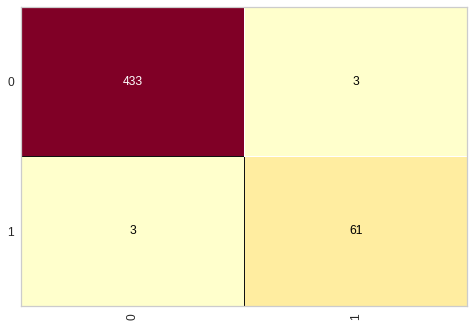

In [ ]:
cm = ConfusionMatrix(svm_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base de dados do censo - 85.11% (kernel='linear', C=6.0)


In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
svm_censo = SVC(kernel='linear', random_state=1, C=6.0)
svm_censo.fit(x_census_treinamento, y_census_treinamento)

SVC(C=6.0, kernel='linear', random_state=1)

In [ ]:
previsoes = svm_censo.predict(x_census_teste)
accuracy_score(y_census_teste, previsoes)

0.8511770726714432

0.8511770726714432

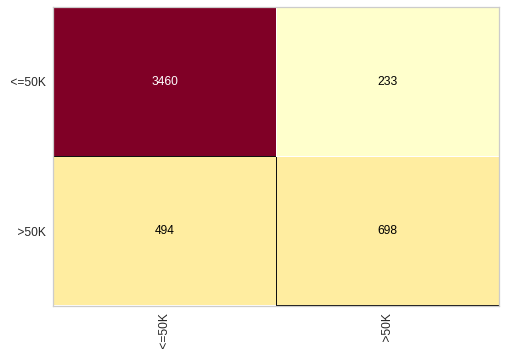

In [ ]:
cm = ConfusionMatrix(svm_censo)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90      3693
        >50K       0.75      0.59      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

## Base de dados de crédito - 99.8%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.00001, solver='adam', activation='relu', hidden_layer_sizes=(2,2))
rede_neural_credit.fit(x_credit_treinamento, y_credit_treinamento)

In [ ]:
previsoes = rede_neural_credit.predict(x_credit_teste)
accuracy_score(previsoes, y_credit_teste)

0.998

0.998

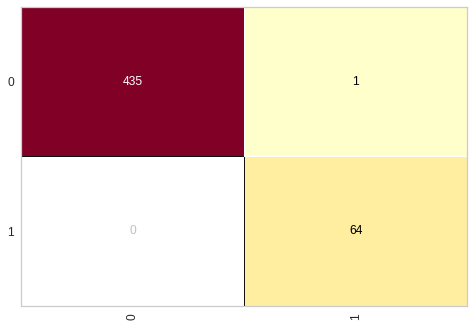

In [ ]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## Base de dados do censo - 81.96%

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
rede_neural_censo = MLPClassifier(max_iter=1500, tol=0.00001, hidden_layer_sizes=(55,55))
rede_neural_censo.fit(x_census_treinamento, y_census_treinamento)

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1500, tol=1e-05)

In [ ]:
previsoes = rede_neural_censo.predict(x_census_teste)
accuracy_score(y_census_teste, previsoes)

0.8196519959058342

0.8196519959058342

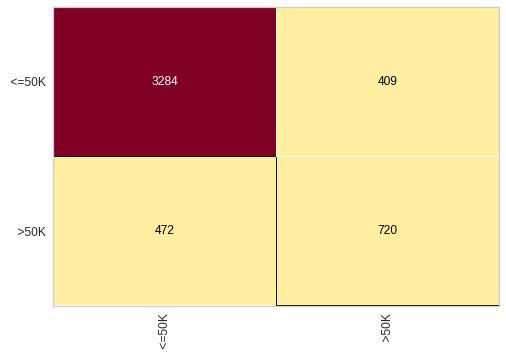

In [ ]:
cm = ConfusionMatrix(rede_neural_censo)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      3693
        >50K       0.64      0.60      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885



# Avaliação dos Algoritmos 

* Naive Bayes: Crédito = 93.8% / Censo = 47.67% 

* Árvore de Decisão Simples: Crédito = 98.2%, Censo = 81.04%

* Random Forest: Crédito = 98.2%, Censo = 85.07%

* Regras: Crédito = 97.2%, Censo = 82.49% 

* Majority Learner: Crédito = 85.85%, Censo = 75.91%

* kNN: Crédito = 98.6%, Censo = 82.23%

* Regressão Logística: Crédito = 94.6%, Censo = 84.95%

* Rede Neural Artificial: Crédito = 99.8%, Censo = 81.96%

# Tuning dos parâmetros com GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Base de dados de crédito

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
x_credit.shape

(2000, 3)

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

### Árvore de Decisão - 98.3%


In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'} 0.983


### Random Forest - 98.75%

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150} 0.9875


### kNN - 98%

In [ ]:
parametros = {
    'n_neighbors': [3, 5, 10, 20],
    'p': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'n_neighbors': 20, 'p': 1} 0.9800000000000001


### Regressão Logística - 94.84%

In [ ]:
parametros = {
    'tol': [0.0001, 0.00001, 0.000001],
    'C': [1.0, 1.5, 2.0],
    'solver': ['lbfgs', 'sag', 'saga']
}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001} 0.9484999999999999


### SVM - 98.29%

In [ ]:
parametros1 = {
    'tol': [0.001, 0.0001, 0.00001],
    'C': [1.0, 1.5, 2.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros1)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001} 0.9829999999999999


### Rede Neural Artificial - 99.64%

In [ ]:
parametros = {
    'activation': ['relu', 'logistic', 'tahn'],
    'solver': ['adam', 'sgd'],
    'batch_size': [10, 56]
}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

In [ ]:
print(melhores_parametros, melhor_resultado)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'} 0.9964999999999999


## Base de dados do censo

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
x_censo = np.concatenate((x_census_treinamento, x_census_teste), axis = 0)
x_censo.shape

(32561, 108)

In [ ]:
y_censo = np.concatenate((y_census_treinamento, y_census_teste), axis = 0)
y_censo.shape

(32561,)

### Árvore de Decisão - 84.63%

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]
}

In [ ]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_censo, y_censo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'} 0.8463192260347949


### Random Forest - 86.30%

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_censo, y_censo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100} 0.8630261967088314


### kNN - 83.28%

In [ ]:
parametros = {
    'n_neighbors': [3, 5, 10, 20],
    'p': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_censo, y_censo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'n_neighbors': 20, 'p': 1} 0.8328675195441662


### Regressão Logística - 85.16%

In [ ]:
parametros = {
    'tol': [0.0001, 0.00001, 0.000001],
    'C': [1.0, 1.5, 2.0],
    'solver': ['lbfgs', 'sag', 'saga']
}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_censo, y_censo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

{'C': 1.0, 'solver': 'sag', 'tol': 0.0001} 0.8516322392070895


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### SVM - 85.11%

In [ ]:
parametros = {
    'tol': [0.001, 0.0001, 0.00001],
    'C': [1.0, 1.5, 2.0],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_censo, y_censo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

{'C': 1.0, 'kernel': 'linear', 'tol': 0.0001} 0.8511101780562859


### Rede Neural Artificial  85.23%

In [ ]:
parametros = {
    'activation': ['relu', 'logistic', 'tahn'],
    'solver': ['adam', 'sgd'],
    'batch_size': [10, 56]
}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_censo, y_censo)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros, melhor_resultado)

# Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Base de dados de crédito

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
x_credit.shape

(2000, 3)

In [ ]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_regressao_logistica = []
resultados_svm = []
resultados_rede_neural = []
for i in range(30): #300 testes por algoritmo
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  score_arvore = cross_val_score(arvore, x_credit, y_credit, cv = kfold)
  resultados_arvore.append(score_arvore.mean())

  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
  score_random_forest = cross_val_score(random_forest, x_credit,  y_credit, cv=kfold)
  resultados_random_forest.append(score_random_forest.mean())

  knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
  score_knn = cross_val_score(knn, x_credit, y_credit, cv=kfold)
  resultados_knn.append(score_knn.mean())

  regressao_logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
  score_regressao_logistica = cross_val_score(regressao_logistica, x_credit, y_credit, cv=kfold)
  resultados_regressao_logistica.append(score_regressao_logistica.mean())

  svm = SVC(C=1.5, kernel='rbf', tol=0.001)
  score_svm = cross_val_score(svm, x_credit, y_credit, cv=kfold)
  resultados_svm.append(score_svm.mean())

  rede_neural = MLPClassifier(max_iter=1500, tol=0.00001, solver='adam', activation='relu', hidden_layer_sizes=(2,2))
  score_rede_neural = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
  resultados_rede_neural.append(score_rede_neural.mean())

In [ ]:
resultados_credito = pd.DataFrame({'Arvore': resultados_arvore, 'Rand.Forest': resultados_random_forest, 'kNN': resultados_knn,
                                   'Reg. Logística': resultados_regressao_logistica, 'SVM': resultados_svm, 'R.Neural': resultados_rede_neural})
resultados_credito.describe()

Arvore  Rand.Forest        kNN  Reg. Logística        SVM   R.Neural
count  30.000000    30.000000  30.000000       30.000000  30.000000  30.000000
mean    0.987183     0.987600   0.980050        0.946950   0.983983   0.970300
std     0.001826     0.001517   0.001533        0.000687   0.001141   0.012225
min     0.983000     0.984500   0.977000        0.945500   0.982000   0.944000
25%     0.986125     0.986500   0.979000        0.946500   0.983500   0.962000
50%     0.987250     0.987500   0.980000        0.947000   0.984000   0.971250
75%     0.988500     0.989000   0.981000        0.947500   0.984500   0.979500
max     0.990500     0.990000   0.982500        0.948500   0.987000   0.992000

## Base de dados do censo


In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_censo = np.concatenate((x_census_treinamento, x_census_teste), axis = 0)
x_censo.shape

(32561, 108)

In [ ]:
y_censo = np.concatenate((y_census_treinamento, y_census_teste), axis = 0)
y_censo.shape

(32561,)

In [ ]:
arvore_resultados = []
random_forest_resultados = []
knn_resultados = []
regressao_logistica_resultados = []
svm_resultados = []
rede_neural_resultados = []

for i in range(5): # 50 testes 
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=2, splitter='random')
  score_arvore = cross_val_score(arvore, x_censo, y_censo, cv=kfold)
  arvore_resultados.append(score_arvore.mean())

  random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=5, min_samples_split=10, n_estimators=100)
  score_random_forest = cross_val_score(random_forest, x_censo, y_censo, cv=kfold)
  random_forest_resultados.append(score_random_forest.mean())

  knn = KNeighborsClassifier(n_neighbors=20, p=1)
  score_knn = cross_val_score(knn, x_censo, y_censo, cv=kfold)
  knn_resultados.append(score_knn.mean())

  regressao_logistica  = LogisticRegression(C=1.0, solver='sag', tol=0.0001)
  score_regressao_logistica = cross_val_score(regressao_logistica, x_censo, y_censo, cv=kfold)
  regressao_logistica_resultados.append(score_regressao_logistica.mean())

  svm = SVC(C=1.0, kernel='linear', tol=0.0001)
  score_svm = cross_val_score(svm, x_censo, y_censo, cv=kfold)
  svm_resultados.append(score_svm.mean())

  rede_neural = MLPClassifier(activation='logistic', batch_size=56, solver='sgd')
  score_rede_neural = cross_val_score(rede_neural, x_censo, y_censo, cv=kfold)
  rede_neural_resultados.append(score_rede_neural.mean())  

In [ ]:
resultados_censo = pd.DataFrame({'Arvore': arvore_resultados, 'Rand.Forest': random_forest_resultados, 'kNN': knn_resultados,
                                   'Reg. Logística': regressao_logistica_resultados, 'SVM': svm_resultados, 'R.Neural': rede_neural_resultados})
resultados_censo.describe()

Arvore  Rand.Forest       kNN  Reg. Logística       SVM  R.Neural
count  5.000000     5.000000  5.000000        5.000000  5.000000  5.000000
mean   0.844255     0.863149  0.834127        0.852081  0.851424  0.851860
std    0.002907     0.000859  0.000531        0.000294  0.000110  0.000336
min    0.839286     0.861798  0.833390        0.851632  0.851233  0.851448
25%    0.844139     0.862996  0.834004        0.852001  0.851448  0.851633
50%    0.845582     0.863180  0.834096        0.852155  0.851448  0.851878
75%    0.845767     0.863794  0.834280        0.852185  0.851479  0.852031
max    0.846503     0.863978  0.834864        0.852431  0.851510  0.852308

# Teste de normalidade nos resultados


In [ ]:
from scipy.stats import shapiro

## Base de dados de crédito

In [ ]:
alpha = 0.05
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn),
shapiro(resultados_regressao_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9677326083183289, pvalue=0.47914642095565796),
 ShapiroResult(statistic=0.9551616907119751, pvalue=0.23190481960773468),
 ShapiroResult(statistic=0.9584026336669922, pvalue=0.28181564807891846),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.96373051404953, pvalue=0.384358674287796),
 ShapiroResult(statistic=0.9722425937652588, pvalue=0.6021841168403625))

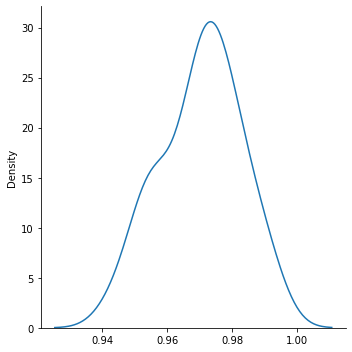

In [ ]:
sns.displot(resultados_rede_neural, kind='kde');

## Base de dados do censo

In [ ]:
shapiro(arvore_resultados), shapiro(random_forest_resultados), shapiro(knn_resultados), shapiro(regressao_logistica_resultados), shapiro(svm_resultados), shapiro(rede_neural_resultados)

(ShapiroResult(statistic=0.7967578768730164, pvalue=0.0762312188744545),
 ShapiroResult(statistic=0.9126712083816528, pvalue=0.4838081896305084),
 ShapiroResult(statistic=0.9724767208099365, pvalue=0.8908992409706116),
 ShapiroResult(statistic=0.9552361965179443, pvalue=0.7744837999343872),
 ShapiroResult(statistic=0.7618881464004517, pvalue=0.038207683712244034),
 ShapiroResult(statistic=0.9870360493659973, pvalue=0.9683197736740112))

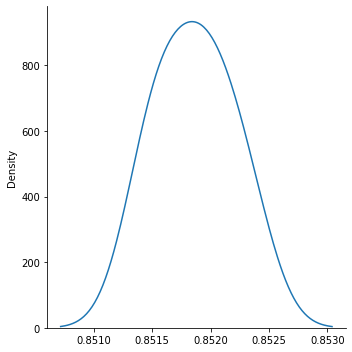

In [ ]:
sns.displot(rede_neural_resultados, kind='kde');

# Teste de hipótese com ANOVA e Tukey

In [ ]:
from scipy.stats import f_oneway

## Base de dados de crédito

In [ ]:
_,p_credito = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn,
             resultados_regressao_logistica, resultados_svm, resultados_rede_neural)
p_credito

1.2900159063298516e-80

In [ ]:
alpha = 0.05
if p_credito<=alpha:
  print('Hipótese nula rejeitada. Dados são diferentes.')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes.


In [ ]:
resultados_algoritmos_credito = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn,
             resultados_regressao_logistica, resultados_svm, resultados_rede_neural]),
             'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                           'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                           'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                           'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica',
                           'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
                           'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [ ]:
resultados_df_credito = pd.DataFrame(resultados_algoritmos_credito)
resultados_df_credito

accuracy    algoritmo
0      0.9865       arvore
1      0.9835       arvore
2      0.9905       arvore
3      0.9875       arvore
4      0.9885       arvore
..        ...          ...
175    0.9800  rede_neural
176    0.9805  rede_neural
177    0.9605  rede_neural
178    0.9680  rede_neural
179    0.9705  rede_neural

[180 rows x 2 columns]

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos_credito = MultiComparison(resultados_df_credito['accuracy'], resultados_df_credito['algoritmo'])

In [ ]:
teste_estatistico_credito = compara_algoritmos_credito.tukeyhsd()
print(teste_estatistico_credito)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071  0.001  -0.011 -0.0033   True
       arvore random_forest   0.0004    0.9 -0.0034  0.0042  False
       arvore   rede_neural  -0.0169  0.001 -0.0207 -0.0131   True
       arvore reg.logistica  -0.0402  0.001 -0.0441 -0.0364   True
       arvore           svm  -0.0032 0.1599  -0.007  0.0006  False
          knn random_forest   0.0075  0.001  0.0037  0.0114   True
          knn   rede_neural  -0.0098  0.001 -0.0136 -0.0059   True
          knn reg.logistica  -0.0331  0.001 -0.0369 -0.0293   True
          knn           svm   0.0039 0.0406  0.0001  0.0078   True
random_forest   rede_neural  -0.0173  0.001 -0.0211 -0.0135   True
random_forest reg.logistica  -0.0406  0.001 -0.0445 -0.0368   True
random_forest           svm  -0.0036 0.0768 -0.0074  0.0002  F

In [ ]:
resultados_credito.mean()

Arvore            0.987183
Rand.Forest       0.987600
kNN               0.980050
Reg. Logística    0.946950
SVM               0.983983
R.Neural          0.970300
dtype: float64

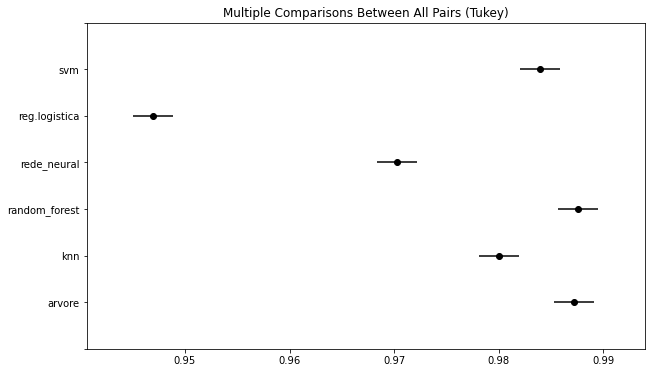

In [ ]:
teste_estatistico_credito.plot_simultaneous();

## Base de dados do censo

In [ ]:
_,p_censo = f_oneway(arvore_resultados, random_forest_resultados, knn_resultados,
             regressao_logistica_resultados, svm_resultados, rede_neural_resultados)
p_censo

1.2911107982047989e-20

In [ ]:
alpha = 0.05
if p_censo<=alpha:
  print('Hipótese nula rejeitada. Dados são diferentes.')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes.


In [ ]:
print(len(arvore_resultados), len(random_forest_resultados), len(knn_resultados), len(regressao_logistica_resultados), len(svm_resultados), len(rede_neural_resultados))

5 5 5 5 5 5


In [ ]:
resultados_algoritmos_censo = {'accuracy': np.concatenate([arvore_resultados, random_forest_resultados, knn_resultados,
             regressao_logistica_resultados, svm_resultados, rede_neural_resultados]),
             'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                           'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                           'knn', 'knn', 'knn', 'knn', 'knn',
                           'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica', 'reg.logistica',
                           'svm', 'svm', 'svm', 'svm', 'svm',
                           'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [ ]:
resultados_df_censo = pd.DataFrame(resultados_algoritmos_censo)

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos_censo = MultiComparison(resultados_df_censo['accuracy'], resultados_df_censo['algoritmo'])

In [ ]:
teste_estatistico_censo = compara_algoritmos_censo.tukeyhsd()
print(teste_estatistico_censo)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn  -0.0101 0.001 -0.0126 -0.0076   True
       arvore random_forest   0.0189 0.001  0.0164  0.0214   True
       arvore   rede_neural   0.0076 0.001  0.0051  0.0101   True
       arvore reg.logistica   0.0078 0.001  0.0053  0.0103   True
       arvore           svm   0.0072 0.001  0.0047  0.0097   True
          knn random_forest    0.029 0.001  0.0265  0.0315   True
          knn   rede_neural   0.0177 0.001  0.0152  0.0202   True
          knn reg.logistica    0.018 0.001  0.0155  0.0204   True
          knn           svm   0.0173 0.001  0.0148  0.0198   True
random_forest   rede_neural  -0.0113 0.001 -0.0138 -0.0088   True
random_forest reg.logistica  -0.0111 0.001 -0.0136 -0.0086   True
random_forest           svm  -0.0117 0.001 -0.0142 -0.0092   True
  rede_neu

In [ ]:
resultados_censo.mean()

Arvore            0.844255
Rand.Forest       0.863149
kNN               0.834127
Reg. Logística    0.852081
SVM               0.851424
R.Neural          0.851860
dtype: float64

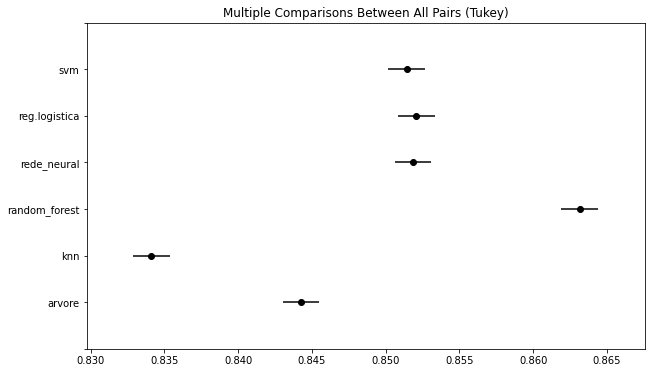

In [ ]:
teste_estatistico_censo.plot_simultaneous();

# Salvando um classificador já treinado

## Base de dados de crédito

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
x_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# 3 melhores resultados de acordo com os dados dos 'testes estatísticos

In [ ]:
classificador_credito_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best');
classificador_credito_arvore.fit(x_credit, y_credit)

classificador_credito_random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=150);
classificador_credito_random_forest.fit(x_credit, y_credit)

classificador_credito_svm = SVC(C=1.5, kernel='rbf', tol=0.001, probability=True);
classificador_credito_svm.fit(x_credit, y_credit)

SVC(C=1.5, probability=True)

In [ ]:
import pickle
pickle.dump(classificador_credito_arvore, open('arvore_credito_finalizado.sav', 'wb'))
pickle.dump(classificador_credito_random_forest, open('random_forest_credito_finalizado.sav', 'wb'))
pickle.dump(classificador_credito_svm, open('svm_credito_finalizado.sav', 'wb'))

## Base de dados do censo

In [ ]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_censo = np.concatenate((x_census_treinamento, x_census_teste), axis = 0)
y_censo = np.concatenate((y_census_treinamento, y_census_teste), axis = 0)
x_censo.shape, y_censo.shape

((32561, 108), (32561,))

In [ ]:
# 3 melhores resultados
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
classificador_censo_random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=5, min_samples_split=10, n_estimators=100)
classificador_censo_random_forest.fit(x_censo, y_censo)

classificador_censo_regressao_logistica = LogisticRegression(C=1.0, solver='sag', tol=0.0001)
classificador_censo_regressao_logistica.fit(x_censo, y_censo)

classificador_censo_rede_neural = MLPClassifier(activation='logistic', batch_size=56, solver='sgd')
classificador_censo_rede_neural.fit(x_censo, y_censo)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


MLPClassifier(activation='logistic', batch_size=56, solver='sgd')

In [ ]:
import pickle
pickle.dump(classificador_censo_random_forest, open('random_forest_censo_finalizado.sav', 'wb'))
pickle.dump(classificador_censo_regressao_logistica, open('regressao_logistica_censo_finalizado.sav', 'wb'))
pickle.dump(classificador_censo_rede_neural, open('rede_neural_censo_finalizado.sav', 'wb'))

# Combinação de Classificadores

## Base de dados de crédito

In [ ]:
novo_registro_credit = x_credit[0]
novo_registro_credit = novo_registro_credit.reshape(1,-1)
novo_registro_credit, novo_registro_credit.shape

(array([[-1.3754462 ,  0.50631087,  0.10980934]]), (1, 3))

In [ ]:
arvore_credito = pickle.load(open('arvore_credito_finalizado.sav', 'rb'))
random_forest_credito = pickle.load(open('random_forest_credito_finalizado.sav', 'rb'))
svm_credito = pickle.load(open('svm_credito_finalizado.sav', 'rb'))

In [ ]:
resposta_arvore_credito = arvore_credito.predict(novo_registro_credit)
resposta_random_forest_credito = random_forest_credito.predict(novo_registro_credit)
resposta_svm_credito = svm_credito.predict(novo_registro_credit)

In [ ]:
resposta_arvore_credito, resposta_random_forest_credito, resposta_svm_credito

(array([0]), array([0]), array([0]))

In [ ]:
paga = 0
nao_paga = 0

if resposta_arvore_credito[0] == 1:
  nao_paga += 1
else: 
  paga += 1

if resposta_random_forest_credito[0] == 1:
  nao_paga += 1
else: 
  paga += 1

if resposta_svm_credito[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('cliente pagará o empréstimo')
elif paga == nao_paga:
  print('empate')
else:
  print('cliente não pagará o empréstimo')

cliente pagará o empréstimo


## Base de dados do censo

In [ ]:
novo_registro_censo = x_censo[0]
novo_registro_censo = novo_registro_censo.reshape(1,-1)

In [ ]:
random_forest_censo = pickle.load(open('random_forest_censo_finalizado.sav', 'rb'))
rede_neural_censo = pickle.load(open('rede_neural_censo_finalizado.sav', 'rb'))
regressao_logistica_censo = pickle.load(open('regressao_logistica_censo_finalizado.sav', 'rb'))

In [ ]:
resposta_random_forest_censo = random_forest_censo.predict(novo_registro_censo)
resposta_rede_neural_censo = rede_neural_censo.predict(novo_registro_censo)
resposta_regressao_logistica_censo = regressao_logistica_censo.predict(novo_registro_censo)

In [ ]:
resposta_random_forest_censo, resposta_rede_neural_censo, resposta_regressao_logistica_censo

(array([' <=50K'], dtype=object),
 array([' <=50K'], dtype='<U6'),
 array([' <=50K'], dtype=object))

In [ ]:
menor_50 = 0
maior_50 = 0

if resposta_random_forest_censo[0] == ' <=50K':
  menor_50 += 1
else:
  maior_50 += 1

if resposta_rede_neural_censo[0] == ' <=50K':
  menor_50 += 1
else:
  maior_50 += 1

if resposta_regressao_logistica_censo[0] == ' <=50K':
  menor_50 += 1
else:
  maior_50 += 1

if maior_50 > menor_50:
  print('ganha mais de 50k por ano')
elif maior_50 == menor_50:
  print('empate')
else:
  print('ganha menos de 50k por ano')

ganha menos de 50k por ano


# Rejeição de Classificadores

## Base de dados de crédito

In [ ]:
prob_arvore_credito = arvore_credito.predict_proba(novo_registro_credit)
prob_random_forest_credito = random_forest_credito.predict_proba(novo_registro_credit)
prob_svm_credito = svm_credito.predict_proba(novo_registro_credit)

In [ ]:
confianca_arvore_credito = prob_arvore_credito.max()
confianca_random_forest_credito = prob_random_forest_credito.max()
confianca_svm_credito = prob_svm_credito.max()

In [ ]:
confianca_arvore_credito, confianca_random_forest_credito, confianca_svm_credito

(1.0, 1.0, 0.9999961872143038)

## Base de dados do censo


In [ ]:
prob_random_forest_censo = random_forest_censo.predict_proba(novo_registro_censo)
prob_rede_neural_censo = rede_neural_censo.predict_proba(novo_registro_censo)
prob_regressao_logistica_censo = regressao_logistica_censo.predict_proba(novo_registro_censo)

In [ ]:
confianca_random_forest_censo = prob_random_forest_censo.max()
confianca_rede_neural_censo = prob_rede_neural_censo.max()
confianca_regressao_logistica_censo = prob_regressao_logistica_censo.max()

In [ ]:
confianca_random_forest_censo, confianca_rede_neural_censo, confianca_regressao_logistica_censo

(0.7808287846758045, 0.7339454086444717, 0.7501238295249602)

# Regressão Linear Simples

## Base de dados plano de saúde

In [2]:
base_plano_saude = pd.read_csv('/content/plano_saude.csv')

In [4]:
x_plano_saude = base_plano_saude.iloc[:, 0].values

In [5]:
y_plano_saude = base_plano_saude.iloc[:,1].values

In [6]:
# coeficiente de correlação
np.corrcoef(x_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [7]:
x_plano_saude = x_plano_saude.reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)

LinearRegression()

In [9]:
#b0
regressor_plano_saude.intercept_

-558.9490909090912

In [10]:
#b1
regressor_plano_saude.coef_

array([61.86787879])

In [11]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [14]:
grafico = px.scatter(x=x_plano_saude.ravel(), y=y_plano_saude)
grafico.add_scatter(x=x_plano_saude.ravel(), y=previsoes, name='regressao')
grafico.show();

In [16]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [17]:
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

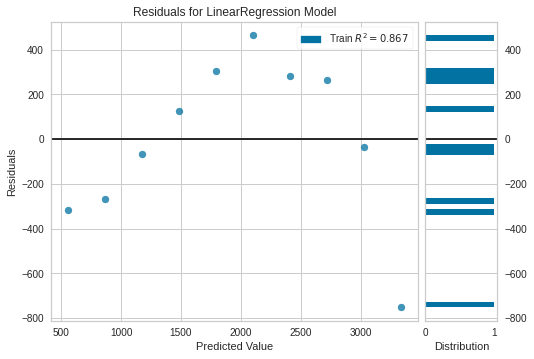

In [19]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude, y_plano_saude)
visualizador.poof()

## Base de dados preço das casas

In [29]:
base_casas = pd.read_csv('/content/house_prices.csv')

In [ ]:
base_casas.describe()

In [ ]:
base_casas.isnull().sum()

In [ ]:
base_casas.corr()

In [ ]:
figura = plt.figure(figsize=(20,20))
sns.heatmap(base_casas.corr(), annot=True);

In [34]:
x_casas = base_casas.iloc[:, 5:6].values #sqft_living
y_casas = base_casas.iloc[:,2].values

In [28]:
from sklearn.model_selection import train_test_split

In [38]:
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size = 0.3, random_state = 0)
x_casas_treinamento.shape, y_casas_treinamento.shape, x_casas_teste.shape, y_casas_teste.shape

((15129, 1), (15129,), (6484, 1), (6484,))

In [39]:
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [41]:
#b0
regressor_simples_casas.intercept_, regressor_simples_casas.coef_
#b1


(-37893.59850106726, array([278.32860644]))

In [42]:
regressor_simples_casas.score(x_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [43]:
regressor_simples_casas.score(x_casas_teste, y_casas_teste)

0.48889929019453027

In [44]:
previsoes = regressor_simples_casas.predict(x_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [45]:
grafico = px.scatter(x=x_casas_treinamento.ravel(), y=previsoes)
grafico.show()

In [52]:
grafico1 = px.scatter(x=x_casas_treinamento.ravel(), y=y_casas_treinamento)
grafico2 = px.line(x=x_casas_treinamento.ravel(), y=previsoes)
grafico2.data[0].line.color='red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

In [54]:
previsoes_teste = regressor_simples_casas.predict(x_casas_teste)

In [55]:
abs(y_casas_teste - previsoes_teste).mean()

172604.1288999542

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [58]:
mean_absolute_error(y_casas_teste, previsoes_teste), mean_squared_error(y_casas_teste, previsoes_teste), np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

(172604.1288999542, 70170013932.1159, 264896.23238565685)

In [59]:
grafico1 = px.scatter(x=x_casas_teste.ravel(), y=y_casas_teste)
grafico2 = px.line(x=x_casas_teste.ravel(), y=previsoes_teste)
grafico2.data[0].line.color='red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3

In [62]:
regressor_simples_casas.score(x_casas_treinamento, y_casas_treinamento), regressor_simples_casas.score(x_casas_teste, y_casas_teste)

(0.49453356717789776, 0.48889929019453027)

# Regressão Linear Múltipla

## Base de dados preço das casas

In [65]:
x_casas = base_casas.iloc[:, 3:19]
y_casas = base_casas.iloc[:,2]

In [66]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size = 0.3, random_state = 0)
x_casas_treinamento.shape, y_casas_treinamento.shape, x_casas_teste.shape, y_casas_teste.shape

((15129, 16), (15129,), (6484, 16), (6484,))

In [67]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [68]:
regressor_multiplo_casas.intercept_, regressor_multiplo_casas.coef_

(5736222.703390089,
 array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604120e-03,
         9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
         1.01092121e+05,  6.96565321e+01,  4.25226266e+01, -2.60724691e+03,
         1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05]))

In [69]:
regressor_multiplo_casas.score(x_casas_treinamento, y_casas_treinamento), regressor_multiplo_casas.score(x_casas_teste, y_casas_teste)

(0.7029888085955007, 0.6885414149062681)

In [70]:
previsoes = regressor_multiplo_casas.predict(x_casas_teste)

In [71]:
mean_absolute_error(y_casas_teste, previsoes), mean_squared_error(y_casas_teste, previsoes), np.sqrt(mean_squared_error(y_casas_teste, previsoes))

(123888.44377485247, 42760757001.53604, 206786.74280895293)